<h1 style="text-align: left; color: #3498db;">Predicting Success for CLIMDES Internship Applicants</h1>



<h2 style="text-align: left; color: #3498db;">Importing Libraries and Modules</h2>



In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap


<h2 style="text-align: left; color: #3498db;">Applicant Data Simulation</h2>


In [41]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Number of applicants
n_applicants = 3000

# Simulating academic performance (e.g., GPA on a scale of 4)
academic_performance = np.random.uniform(2.5, 5.0, n_applicants)

# Simulating relevant skills (e.g., a score from 0 to 10)
relevant_skills = np.random.randint(0, 11, n_applicants)

# Simulating years of experience (in months)
experience_months = np.random.randint(0, 49, n_applicants)

# Simulating weekly hours available (e.g., 10 to 40 hours per week)
weekly_hours_available = np.random.randint(10, 41, n_applicants)

# Simulating laptop availability (1 for yes, 0 for no)
laptop_available = np.random.choice([0, 1], n_applicants)

# Simulating constant internet access (1 for yes, 0 for no)
internet_access = np.random.choice([0, 1], n_applicants)

# Defining success criteria for internship applications
# You can customize this based on your specific criteria
success = np.where(
    (academic_performance >= 3.5) &
    (relevant_skills >= 7) &
    (experience_months >= 8) &
    (weekly_hours_available >= 30) &
    (laptop_available == 1) &
    (internet_access == 1),
    1,
    0
)

# Creating a DataFrame to store the simulated data
data = pd.DataFrame({
    'Academic Performance (GPA)': academic_performance,
    'Relevant Skills (0-10)': relevant_skills,
    'Experience (Months)': experience_months,
    'Weekly Hours Available': weekly_hours_available,
    'Laptop Availability': laptop_available,
    'Constant Internet Access': internet_access,
    'Internship Success': success
})

# Displaying the first few rows of the dataset
print(data.head())

# Save the simulated dataset to a CSV file
data.to_csv("simulated_internship_data.csv", index=False)


   Academic Performance (GPA)  Relevant Skills (0-10)  Experience (Months)  \
0                    3.436350                       2                   11   
1                    4.876786                       8                   33   
2                    4.329985                       4                   35   
3                    3.996646                       7                   36   
4                    2.890047                       6                    2   

   Weekly Hours Available  Laptop Availability  Constant Internet Access  \
0                      35                    0                         0   
1                      12                    1                         0   
2                      12                    1                         0   
3                      10                    1                         1   
4                      30                    0                         1   

   Internship Success  
0                   0  
1                   0  
2 

<h2 style="text-align: left; color: #3498db;">Data Pre-processing</h2>


In [42]:
# Loading the simulated dataset
data = pd.read_csv("simulated_internship_data.csv")

# Displaying basic information about the dataset
print(data.info())

# Handling missing values (assuming there are no missing values in the simulated dataset)
# You can customize this part based on your dataset
# Checking for missing values in each column
missing_values = data.isnull().sum()

# Defining a threshold for missing values (e.g., 10%)
missing_threshold = len(data) * 0.1

# Listing columns with missing values exceeding the threshold
columns_with_missing = missing_values[missing_values > missing_threshold].index

# Dropping columns with excessive missing values
data_cleaned = data.drop(columns=columns_with_missing)

# Checking data types and converting if necessary
# For example, ensuring 'Experience (Months)' is of type int
data_cleaned['Experience (Months)'] = data_cleaned['Experience (Months)'].astype(int)

# Encoding categorical variables (if any)
# Here, encoding 'Laptop Availability' and 'Constant Internet Access'
label_encoder = LabelEncoder()
data_cleaned['Laptop Availability'] = label_encoder.fit_transform(data_cleaned['Laptop Availability'])
data_cleaned['Constant Internet Access'] = label_encoder.fit_transform(data_cleaned['Constant Internet Access'])

# Displaying basic information about the cleaned dataset
print(data_cleaned.info())
print(data_cleaned.head())
# Saving the cleaned dataset to a new CSV file
data_cleaned.to_csv("cleaned_internship_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Academic Performance (GPA)  3000 non-null   float64
 1   Relevant Skills (0-10)      3000 non-null   int64  
 2   Experience (Months)         3000 non-null   int64  
 3   Weekly Hours Available      3000 non-null   int64  
 4   Laptop Availability         3000 non-null   int64  
 5   Constant Internet Access    3000 non-null   int64  
 6   Internship Success          3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Academic Performance (GPA)  3000 non-null   float64
 1   Relevant Skills (0-10)      3000 non-null 

<h2 style="text-align: left; color: #3498db;">Model Development</h2>



Model Performance Metrics:
Accuracy: 0.9950
Precision: 1.0000
Recall: 0.5000

Confusion Matrix:
[[594   0]
 [  3   3]]


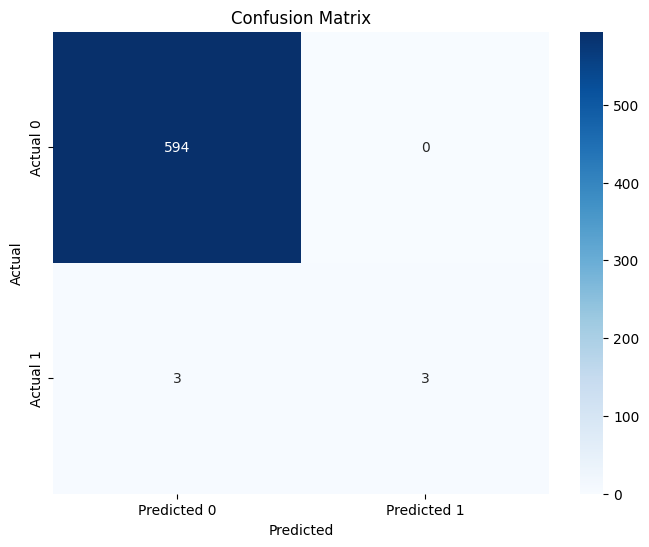

In [43]:
# Loading the simulated dataset
data = pd.read_csv("cleaned_internship_data.csv")

# Splitting the dataset into features (X) and the target variable (y)
X = data.drop(columns=['Internship Success'])
y = data['Internship Success']

# Splitting the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the full list of results
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<h2 style="text-align: left; color: #3498db;">Model Optimization </h2>


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

  0%|          | 0/600 [00:00<?, ?it/s]

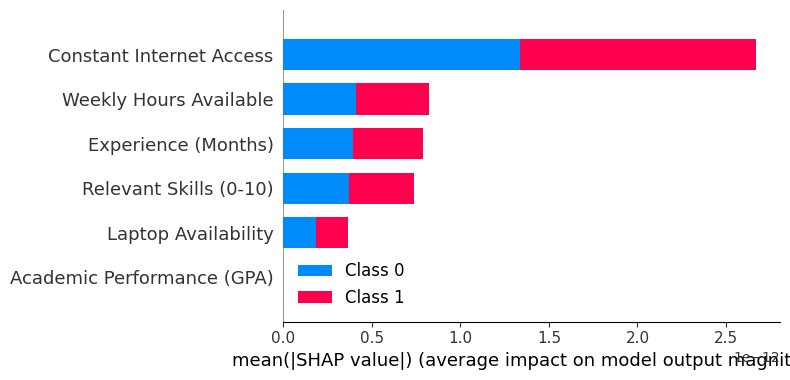

In [47]:

# Setting a random seed for reproducibility
np.random.seed(42)

# Loading the cleaned dataset
data = pd.read_csv("cleaned_internship_data.csv")

# Splitting the dataset into features (X) and the target variable (y)
X = data.drop(columns=['Internship Success'])
y = data['Internship Success']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining hyperparameters to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Creating a logistic regression model
logistic_model = LogisticRegression()

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model with scaled features
best_logistic_model = LogisticRegression(C=best_params['C'], solver=best_params['solver'], max_iter=1000)
best_logistic_model.fit(X_train_scaled, y_train)




# Explain the model's decisions using SHAP values with KernelExplainer
explainer = shap.KernelExplainer(model=best_logistic_model.predict_proba, data=X_train)
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test)

In [32]:
# Saving the model to a file named "trained_logistic_model.pkl"
joblib.dump(best_logistic_model, "trained_logistic_model.pkl")

['trained_logistic_model.pkl']